# 🔧 Feature Engineering & Preprocessing
## House Prices - Advanced Regression Techniques

**Objective:** Create new features, handle missing values, encoding, and transformations

**Pipeline:**
1. Handle missing values
2. Remove outliers
3. Feature Engineering (create 5+ new features)
4. Encoding of categorical variables
5. Logarithmic transformation of the target
6. Feature scaling


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')

from preprocessing import HousePricePreprocessor
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✅ Libraries imported")


✅ Librerías importadas


## 1. Data Loading


In [2]:
train_raw = pd.read_csv('../data/train.csv')
test_raw = pd.read_csv('../data/test.csv')

print(f"Train shape: {train_raw.shape}")
print(f"Test shape: {test_raw.shape}")

y_train = train_raw['SalePrice'].copy()
train_features = train_raw.drop(columns=['SalePrice'])

print(f"\nTarget shape: {y_train.shape}")
print(f"Train features shape: {train_features.shape}")


Train shape: (1460, 81)
Test shape: (1459, 80)

Target shape: (1460,)
Train features shape: (1460, 80)


## 2. Missing Values Analysis


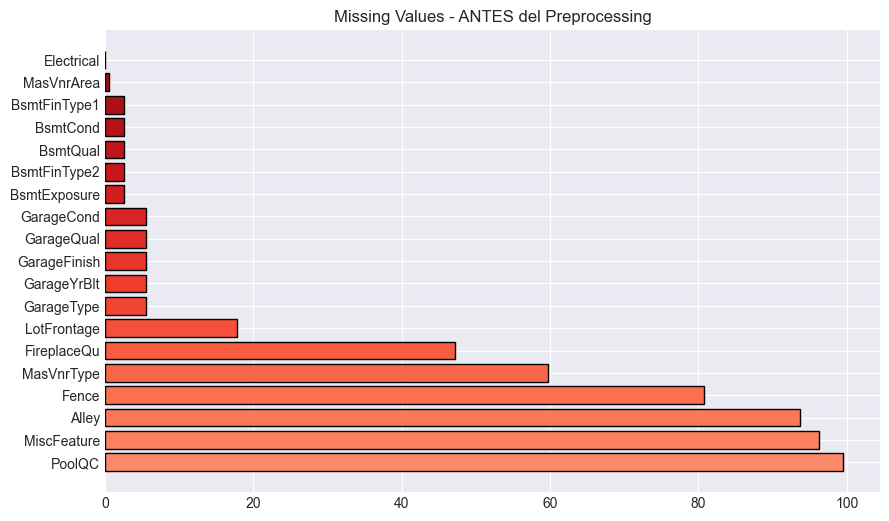

In [3]:
def plot_missing_values(df, title='Missing Values'):
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)

    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing_Count': missing.values,
        'Missing_Pct': missing_pct.values
    })

    missing_df = missing_df[missing_df['Missing_Count'] > 0]\
                    .sort_values('Missing_Pct', ascending=False)

    if len(missing_df) > 0:
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(missing_df)))
        ax.barh(missing_df['Column'], missing_df['Missing_Pct'],
                color=colors, edgecolor='black')
        ax.set_title(title)
        plt.show()
    else:
        print("✅ No hay missing values")

    return missing_df

missing_before = plot_missing_values(
    train_features,
    'Missing Values - ANTES del Preprocessing'
)


## 3. Preprocessing Pipeline


In [4]:
preprocessor = HousePricePreprocessor()

X_train, y_train_log, X_test, test_ids = preprocessor.preprocess_pipeline(
    train_raw.copy(),
    test_raw.copy(),
    target_col='SalePrice'
)



INICIANDO PIPELINE DE PREPROCESAMIENTO

✅ Outliers removed: 2 rows
✅ Missing values handled. Remaining: 0
✅ Feature engineering completed. New shape: (2917, 90)
✅ Encoding completed. Shape: (2917, 231)
✅ Target transformed: log(SalePrice)

PREPROCESAMIENTO COMPLETADO
Train shape: (1458, 231)
Test shape: (1459, 231)
Features: 231


In [ ]:
print("="*70)
print("CHECKING MISSING VALUES AFTER PREPROCESSING")
print("="*70)

print(f"Train - Missing values: {X_train.isnull().sum().sum()}")
if X_test is not None:
    print(f"Test - Missing values: {X_test.isnull().sum().sum()}")

print("\n✅ Missing values handled correctly")


VERIFICACIÓN DE MISSING VALUES DESPUÉS DEL PREPROCESSING
Train - Missing values: 0
Test - Missing values: 0

✅ Missing values manejados correctamente


## 4. Análisis de Features Creadas


In [ ]:
new_features = [
    'TotalSF', 'TotalBath', 'HouseAge', 'RemodAge', 'WasRemodeled',
    'TotalQual', 'TotalPorchSF', 'HasPool', 'HasGarage',
    'HasBsmt', 'Has2ndFloor'
]

print("="*70)
print("NEW FEATURES CREATED")
print("="*70)

for f in new_features:
    print(f"✅ {f}" if f in X_train.columns else f"❌ {f}")

print(f"\n📊 Total final features: {X_train.shape[1]}")


FEATURES NUEVAS CREADAS
✅ TotalSF
✅ TotalBath
✅ HouseAge
✅ RemodAge
✅ WasRemodeled
✅ TotalQual
✅ TotalPorchSF
✅ HasPool
✅ HasGarage
✅ HasBsmt
✅ Has2ndFloor

📊 Total de features finales: 231


In [7]:
X_train_df = X_train if isinstance(X_train, pd.DataFrame) \
    else pd.DataFrame(X_train, columns=preprocessor.feature_names)

y_train_original = preprocessor.inverse_transform_target(y_train_log)

temp_df = X_train_df.copy()
temp_df['SalePrice'] = y_train_original

new_features_present = [f for f in new_features if f in temp_df.columns]

correlations_new = temp_df[new_features_present + ['SalePrice']]\
    .corr()['SalePrice']\
    .drop('SalePrice')\
    .sort_values(ascending=False)

print(correlations_new)


TotalSF         0.297005
TotalBath       0.244598
TotalQual       0.209207
HasGarage       0.074453
HasPool         0.068107
HasBsmt         0.059699
TotalPorchSF    0.041408
Has2ndFloor     0.034388
WasRemodeled   -0.033461
RemodAge       -0.181270
HouseAge       -0.196342
Name: SalePrice, dtype: float64


## 5. Target Transformation Analysis


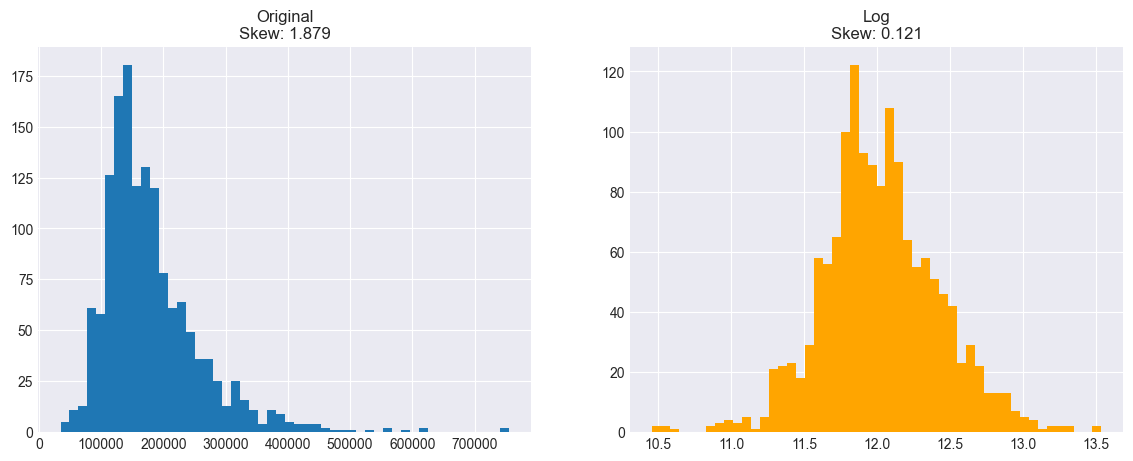

In [8]:
from scipy.stats import skew, kurtosis

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(y_train_original, bins=50)
axes[0].set_title(f"Original\nSkew: {skew(y_train_original):.3f}")

axes[1].hist(y_train_log, bins=50, color='orange')
axes[1].set_title(f"Log\nSkew: {skew(y_train_log):.3f}")

plt.show()


## 6. Encoding of Categorical Variables


In [ ]:
print(f"Original features: 79")
print(f"Final features: {X_train_df.shape[1]}")


Features originales: 79


NameError: name 'X_train_df' is not defined

## 7. Distribution of Numerical Features


In [10]:
numeric_cols = X_train_df.select_dtypes(include=[np.number]).columns
skewness = X_train_df[numeric_cols].apply(lambda x: skew(x.dropna()))
high_skew = skewness[abs(skewness) > 0.75]

print(high_skew.sort_values(ascending=False).head(15))


MiscVal          24.434913
PoolQC           17.535394
PoolArea         15.932532
HasPool          15.492067
LotArea          12.560986
3SsnPorch        10.286510
LowQualFinSF      8.995688
KitchenAbvGr      4.480268
BsmtFinSF2        4.247550
ScreenPorch       4.114690
BsmtHalfBath      4.095895
EnclosedPorch     3.083987
MasVnrArea        2.693554
OpenPorchSF       2.337421
TotalPorchSF      2.009401
dtype: float64


## 8. Save Processed Data


In [ ]:
np.save('../data/X_train_processed.npy', X_train_df.values)
np.save('../data/y_train_log.npy', y_train_log)

if X_test is not None:
    np.save('../data/X_test_processed.npy', X_test.values)
    np.save('../data/test_ids.npy', test_ids)

with open('../data/feature_names.txt', 'w') as f:
    for feat in preprocessor.feature_names:
        f.write(f"{feat}\n")

print("✅ Processed data saved")


✅ Datos procesados guardados
